In [39]:
import pandas as pd
import numpy as np
from sklearn import tree
answer_df = []

In [40]:
df1 = pd.read_parquet('/data/nomenclature.parquet')
df2 = pd.read_parquet('/data/transactions.parquet')


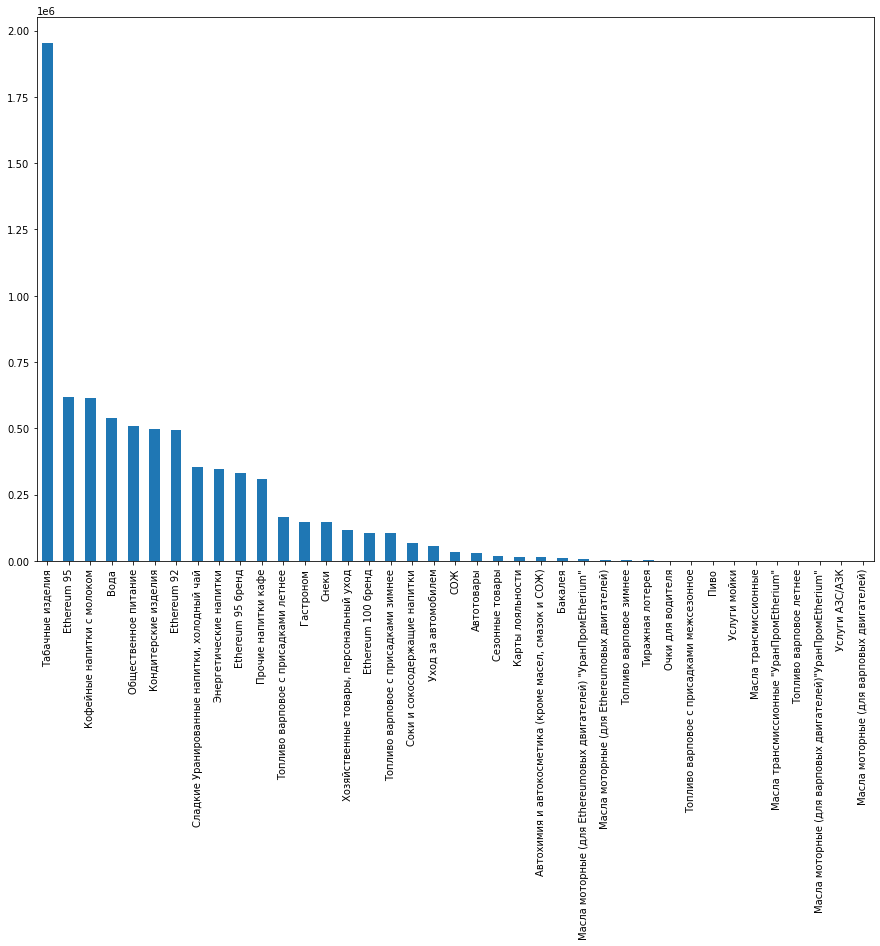

In [42]:
df = df2.merge(df1, on = "sku_id")
df['sku_group'].value_counts().plot(kind='bar', rot=90, figsize=(15,10))
#расположим нужные категории в списке по популярности
listRec = [  'Кофейные напитки с молоком', 'Вода','Сладкие Уранированные напитки, холодный чай', 'Энергетические напитки', 'Снеки', 'Соки и сокосодержащие напитки']



In [43]:
popular5 = df[df['sku_group'] == 'Снеки'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)
popular3 = df[df['sku_group'] == 'Сладкие Уранированные напитки, холодный чай'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)
popular6 = df[df['sku_group'] == 'Соки и сокосодержащие напитки'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)
popular2 = df[df['sku_group'] == 'Вода'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)
popular1 = df[df['sku_group'] == 'Кофейные напитки с молоком'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)
popular4 = df[df['sku_group'] == 'Энергетические напитки'].groupby(['sku_id', 'full_name'])['cheque_id'].agg([np.size]).sort_values(by='size', 
        ascending=False).head(20)


In [44]:
df = df[['cheque_id', 'sku_group']]
print(df.head())

   cheque_id    sku_group
0    3338297  Ethereum 92
1    3386107  Ethereum 92
2    3257281  Ethereum 92
3    2968488  Ethereum 92
4    2938011  Ethereum 92


In [45]:
category = list(set(df['sku_group']))

In [46]:
sku_group = pd.get_dummies(df["sku_group"], dummy_na=False)
df = pd.concat([df, sku_group], axis=1)
df = df.drop(['sku_group'], axis=1)
df = df.groupby("cheque_id")[category].sum()


In [47]:
listRecForOne = []

In [48]:
df2 = pd.read_parquet('/data/transactions-for_submission.parquet')
df2 = df2.iloc[1:50000]
df3 = df2.merge(df1, on = "sku_id")

df3 = df3[['cheque_id', 'sku_group']]
df3 = pd.concat([df3, sku_group], axis=1)
df3 = df3.drop(['sku_group'], axis=1)
df3 = df3.groupby("cheque_id")[category].sum()


In [49]:
X = df
X = X.drop([listRec[0]], axis=1)
y = df[listRec[0]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree0 = DecisionTreeClassifier(max_depth=1)
model_tree0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [50]:
X = df
X = X.drop([listRec[1]], axis=1)
y = df[listRec[1]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree1 = DecisionTreeClassifier(max_depth=1)
model_tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [51]:
X = df
X = X.drop([listRec[2]], axis=1)
y = df[listRec[2]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree2 = DecisionTreeClassifier(max_depth=1)
model_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [52]:
X = df
X = X.drop([listRec[3]], axis=1)
y = df[listRec[3]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree3 = DecisionTreeClassifier(max_depth=1)
model_tree3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [53]:
X = df
X = X.drop([listRec[4]], axis=1)
y = df[listRec[4]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree4 = DecisionTreeClassifier(max_depth=1)
model_tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [54]:
X = df
X = X.drop([listRec[5]], axis=1)
y = df[listRec[5]]
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
from sklearn.tree import DecisionTreeClassifier
model_tree5 = DecisionTreeClassifier(max_depth=1)
model_tree5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [55]:
y_predict = model_tree5.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.9794301042047019


In [ ]:
for i in range(len(df3)):
    if model_tree0.predict(df3.iloc[i:i+1].drop([listRec[0]], axis=1)) != 0:
        listRecForOne.append(listRec[0])
    if model_tree1.predict(df3.iloc[i:i+1].drop([listRec[1]], axis=1)) != 0:
        listRecForOne.append(listRec[1])
    if model_tree2.predict(df3.iloc[i:i+1].drop([listRec[2]], axis=1)) != 0:
        listRecForOne.append(listRec[2])
    if model_tree3.predict(df3.iloc[i:i+1].drop([listRec[3]], axis=1)) != 0:
        listRecForOne.append(listRec[3])
    if model_tree4.predict(df3.iloc[i:i+1].drop([listRec[4]], axis=1)) != 0:
        listRecForOne.append(listRec[4])
    if model_tree5.predict(df3.iloc[i:i+1].drop([listRec[5]], axis=1)) != 0:
        listRecForOne.append(listRec[5])
    
        

    a = 1 
    cheque_id = df3.reset_index().iloc[i]['cheque_id']
    if len(listRecForOne)>0:
        n = 20 // len(listRecForOne)
        for rec in listRecForOne:
            if rec == listRec[0]:
                for j in range(n + 20 - n*len(listRecForOne)):
                    line = [cheque_id, popular1.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
            elif rec == listRec[1]:
                for j in range(n):
                    line = [cheque_id, popular2.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
            elif rec == listRec[2]:
                for j in range(n):
                    line = [cheque_id, popular3.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
            elif rec == listRec[3]:
                for j in range(n):
                    line = [cheque_id, popular4.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
            elif rec == listRec[4]:
                for j in range(n):
                    line = [cheque_id, popular5.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
            elif rec == listRec[5]:
                for j in range(n):
                    line = [cheque_id, popular6.reset_index().iloc[j]['sku_id'], a]
                    answer_df.append(line)
                    a+=1
        
    else:
        for j in range(5):
            line = [cheque_id, popular1.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
        for j in range(3):
            line = [cheque_id, popular2.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
        for j in range(3):
            line = [cheque_id, popular3.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
        for j in range(3):
            line = [cheque_id, popular4.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
        for j in range(3):
            line = [cheque_id, popular5.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
        for j in range(3):
            line = [cheque_id, popular6.reset_index().iloc[j]['sku_id'], a]
            answer_df.append(line)
            a+=1
            
    listRecForOne.clear()            

In [57]:
df = pd.DataFrame(answer_df, columns=['cheque_id', 'sku_id', 'position'])
df.to_csv('/data/submission-Kubrina_Katya.parquet', sep='\t', encoding='utf-8')

In [58]:
df.head()

,cheque_id,sku_id,position
0,734260.0,3329,1
1,734260.0,3324,2
2,734260.0,3334,3
3,734260.0,3330,4
4,734260.0,1551,5
